<a href="https://colab.research.google.com/github/ancestor9/Gyeongbok-AI-study/blob/main/20250213_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **주성분 분석(Principal COmponent Analysis) : 차원 축소**
## 차원의 저주
<img src ='https://user-images.githubusercontent.com/37679460/136345305-da03f419-048f-48ee-8c51-520b0d1c293f.png' width =600 height=600>

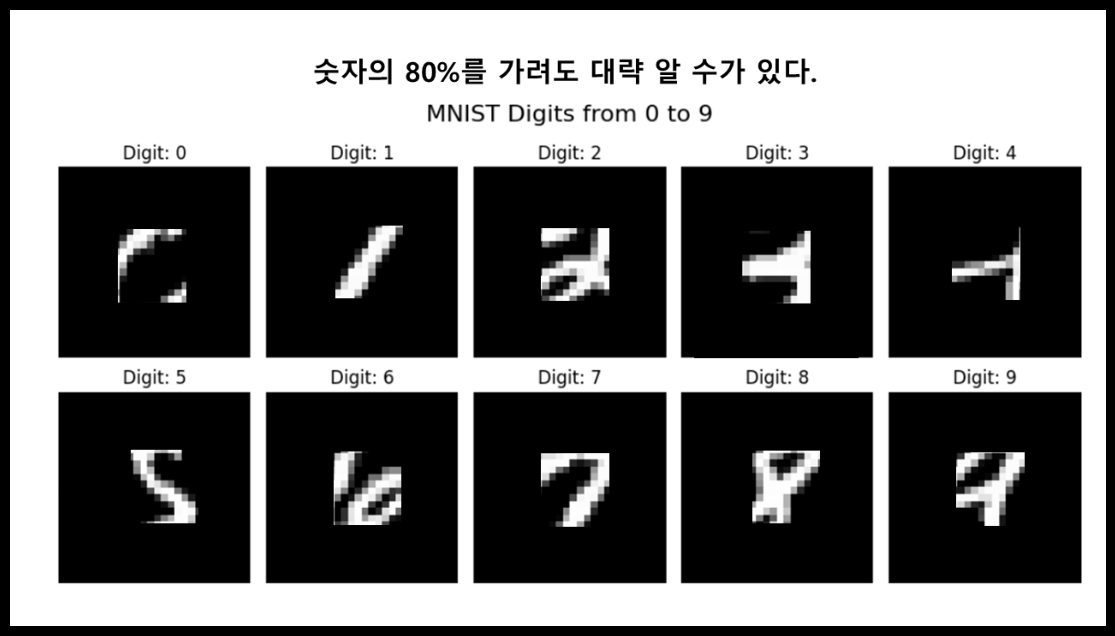

In [9]:
# prompt: /content/슬라이드1.PNG 시각화, 16, 8 크기로

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# 이미지 파일 경로
image_path = '/content/슬라이드1.PNG'

# 이미지 불러오기
img = mpimg.imread(image_path)

# 이미지 시각화 (16x8 크기)
plt.figure(figsize=(16, 8))
plt.imshow(img)
plt.axis('off')  # 축 제거
plt.show()


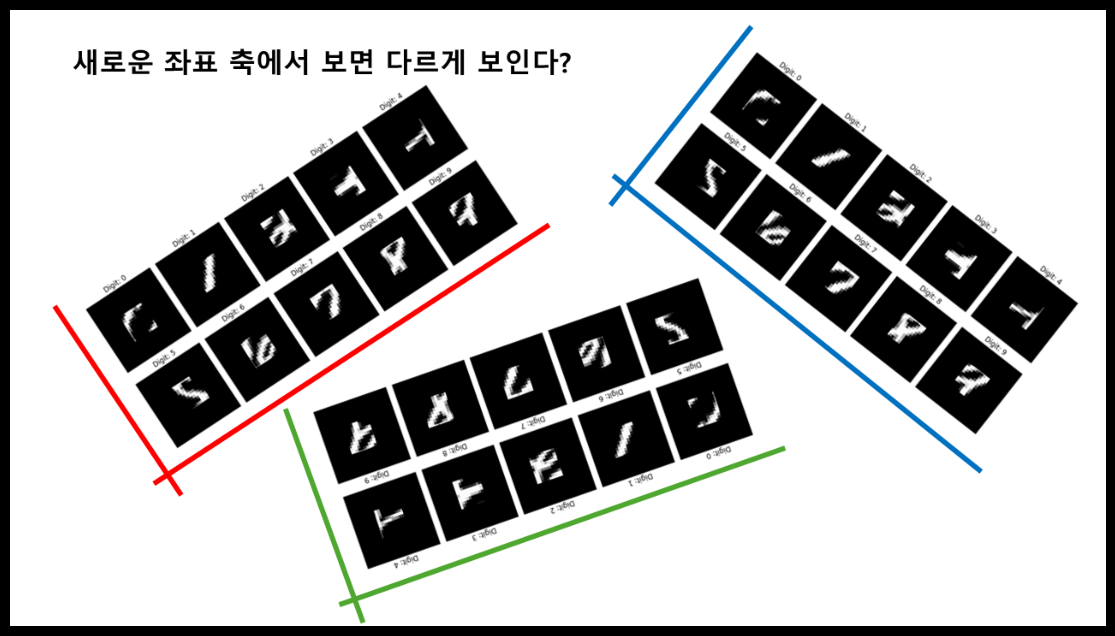

In [10]:
image_path = '/content/슬라이드2.PNG'

# 이미지 불러오기
img = mpimg.imread(image_path)

# 이미지 시각화 (16x8 크기)
plt.figure(figsize=(16, 8))
plt.imshow(img)
plt.axis('off')  # 축 제거
plt.show()

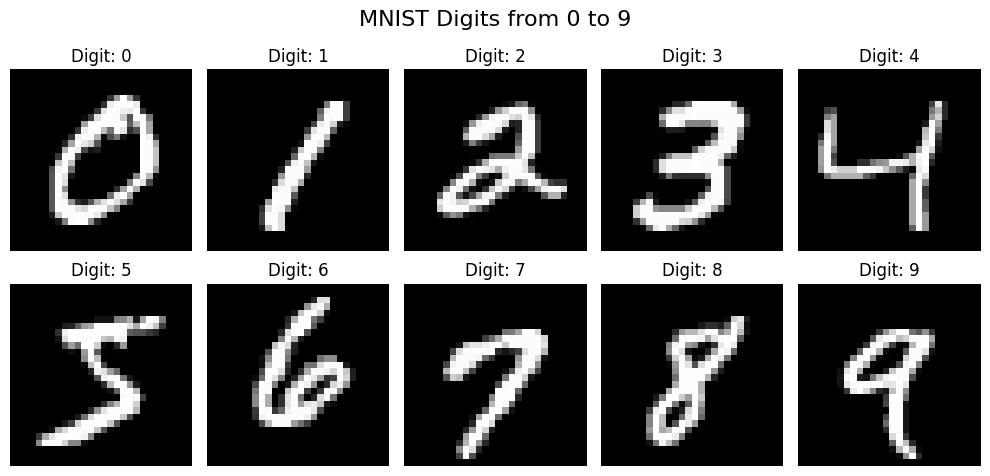

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
import numpy as np

# MNIST 데이터 로드
mnist = fetch_openml('mnist_784', version=1, as_frame=False, parser='pandas')
x, y = mnist.data, mnist.target.astype(int)

# 0부터 9까지 각 숫자에 해당하는 첫 번째 이미지 찾기
unique_digits = np.arange(10)
images = []
labels = []

for digit in unique_digits:
    index = np.where(y == digit)[0][0]  # 첫 번째 등장하는 인덱스 찾기
    images.append(x[index].reshape(28, 28))
    labels.append(digit)

# 시각화 (2줄에 5개씩)
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
fig.suptitle("MNIST Digits from 0 to 9", fontsize=16)

for ax, img, lbl in zip(axes.ravel(), images, labels):
    ax.imshow(img, cmap='gray')
    ax.set_title(f"Digit: {lbl}")
    ax.axis('off')

plt.tight_layout()
plt.show()

In [2]:
x.shape

(70000, 784)

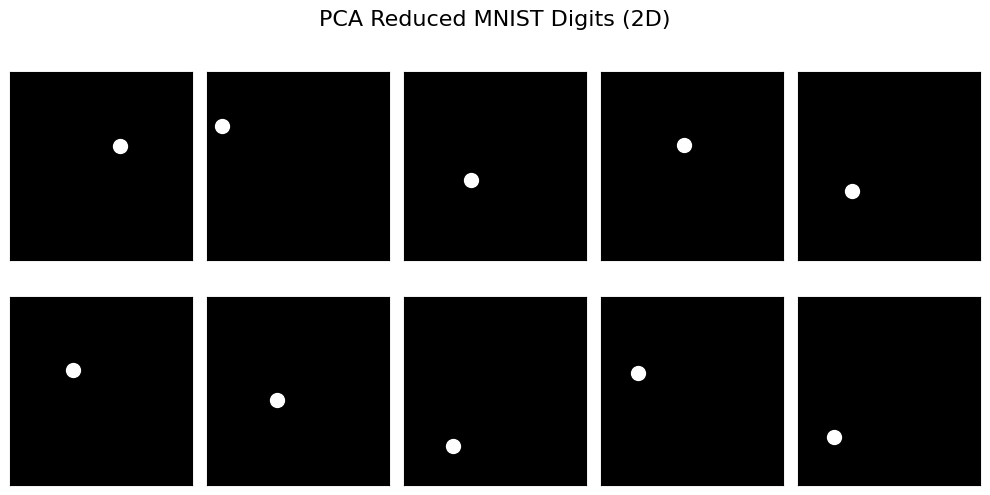

In [5]:
from sklearn.decomposition import PCA

# PCA로 2차원 축소
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x)

# 0부터 9까지 각 숫자에 해당하는 첫 번째 데이터 찾기
unique_digits = np.arange(10)
pca_points = []
labels = []

for digit in unique_digits:
    index = np.where(y == digit)[0][0]  # 첫 번째 등장하는 인덱스 찾기
    pca_points.append(x_pca[index])
    labels.append(digit)

pca_points = np.array(pca_points)

# 시각화 (2줄에 5개씩) - 검은색 배경, 흰색 점
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
fig.suptitle("PCA Reduced MNIST Digits (2D)", fontsize=16)
plt.style.use("dark_background")  # 검은색 배경 적용

for ax, (x_p, y_p), lbl in zip(axes.ravel(), pca_points, labels):
    ax.scatter(x_p, y_p, color='white', marker='o', s=100)  # 흰색 점으로 표시
    ax.set_title(f"Digit: {lbl}", color='white')  # 흰색 글자
    ax.set_xlim(np.min(x_pca[:, 0]), np.max(x_pca[:, 0]))
    ax.set_ylim(np.min(x_pca[:, 1]), np.max(x_pca[:, 1]))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_facecolor('black')  # 개별 플롯 배경도 검은색으로 설정

plt.tight_layout()
plt.show()
